In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import deepmatcher as dm
from utils.intermediate_layer_extraction import return_layer_input
from utils.ri_calculator import computeRi
from utils.distance_measures import nearestNeighborsOnAttribute
import pandas as pd
import torch

In [4]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

## Hybrid

### Datasets creation

In [5]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/itunesamazon_hybrid_glove.pth')
hybrid_model = hybrid_model.cuda()

In [11]:
testneg = return_layer_input(hybrid_model,hybrid_model.classifier,
                             '../../datasets/Structured/itunes-amazon','test_negatives',embeddings='glove.840B.300d')


Reading and processing data from "../../datasets/Structured/itunes-amazon/test_negatives.csv"
0% [############################# ] 100% | ETA: 00:00:00
Building vocabulary
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00

Computing principal components
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
/home/nvidia/anaconda3/envs/torchenv/lib/python3.6/site-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


In [7]:
negatives = return_layer_input(hybrid_model,hybrid_model.classifier,'../../datasets/Structured/itunes-amazon','negatives')

In [8]:
positives = return_layer_input(hybrid_model,hybrid_model.classifier,
                               '../../datasets/Structured/itunes-amazon','positives')

In [12]:
testpos = return_layer_input(hybrid_model,hybrid_model.classifier,
                               '../../datasets/Structured/itunes-amazon','test_positives',embeddings='glove.840B.300d')


Reading and processing data from "../../datasets/Structured/itunes-amazon/test_positives.csv"
0% [########################### ] 100% | ETA: 00:00:00
Building vocabulary
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00

Computing principal components
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


### Negative sample analysis

In [13]:
negatives_ri,neg_rinorms_df= computeRi(hybrid_model.classifier,
                                                    attributes,testneg,0)

100%|██████████| 82/82 [00:19<00:00,  4.28it/s]


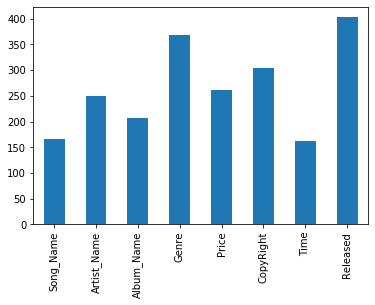

In [14]:
neg_rinorms_df.sum().plot.bar()

In [14]:
torch.save(negatives_ri,'experiments/results/testneg_ri_hybrid.pt')
neg_rinorms_df.to_csv('experiments/results/testneg_ri_norms.csv',index=False)

## Positive samples analisys

In [15]:
pos_ri_hybrid,pos_rinorms_df = computeRi(hybrid_model.classifier,attributes,
                                              testpos,1)

100%|██████████| 27/27 [00:03<00:00,  8.41it/s]


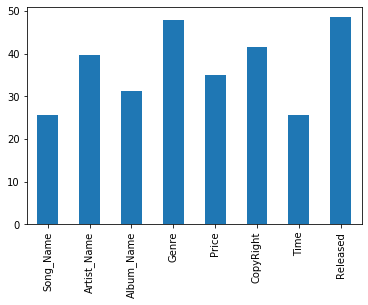

In [16]:
pos_rinorms_df.sum().plot.bar()

In [12]:
torch.save(pos_ri_hybrid,'experiments/results/testpos_ri_hybrid.csv')
pos_rinorms_df.to_csv('experiments/results/testpos_ri_norms.csv',index=False)

## Nearest neighbors hybrid

In [ ]:
positives_nn_hybrid = calculate_nearest_neighbors_onAttributes(positives,pos_ri_hybrid,
                                                       negatives,attributes,attribute_len_hybrid,
                                                               min_similarity=0)

In [ ]:
negatives_nn_hybrid = calculate_nearest_neighbors_onAttributes(negatives,negatives_ri,
                                                        positives,attributes,attribute_len_hybrid,
                                                               min_similarity=0)

In [ ]:
positives_nn_hybrid.to_csv('experiments/results/positivesNNHybridWithoutfilter.csv',index=False)
negatives_nn_hybrid.to_csv('experiments/results/negativesNNhybridWithoutfilter.csv',index=False)

In [ ]:
positives_nn_hybrid['Price'].value_counts()

In [ ]:
negatives = pd.read_csv('../../Structured/itunes-amazon/negatives.csv')
positives = pd.read_csv('../../Structured/itunes-amazon/positives.csv')